In [41]:
import numpy as np
import matplotlib.pyplot as plt

## A single example of log odds

In probability theory, odds provide a measure of the likelihood of a particular outcome. They are calculated as the ratio of the number of events that produce that outcome to the number that do not.

Mathematically, the odds $(\(O\))$ are defined as:

$$
\[O = \frac{p}{1 - p}\]
$$
Where:

$\(O\)$ is the odds.

$\(p\)$ is the probability of the event occurring.

Since the denominator $(\(1 - p\))$ is always positive (given that $\(p\)$ is a valid probability between 0 and 1), the odds $(\(O\))$ can only be non-negative. The odds ratio provides valuable information in various fields, including statistics, epidemiology, and logistic regression, as it represents the relative likelihood of an event occurring compared to it not occurring.



In [42]:
p = 0.7

# if the probability of a particular outcome p is 0.7, then the probability of other outcomes is 1 - 0.7 = 0.3
# and the odds is therefore 0.7 / 0.3 = 2.33
odds_p = (p / (1 - p))

odds_p

2.333333333333333

In [43]:
# the log odds is then just the logarithm of this value
log_odds_p = np.log(odds_p)
log_odds_p

0.8472978603872034

The logistic function can be derived from the formula for log odds by isolating p.

Mathematically, the logistic function is defined as:

$$
\[
p = \frac{1}{1 + e^{-\text{Logit}(p)}}
\]
$$

Where:

- $\(p\)$ is the probability of the event occurring.
- $\(\text{Logit}(p)\)$ represents the log odds (logit) of the event occurring.
- $\(e\)$ is the base of the natural logarithm (Euler's number).

The logistic function will transform the log odds to a probability, thus we can recover the original probability from the log odds like the following:


In [56]:
# Define the sigmoid function (inverse logit)
def sigmoid(logit):
    return 1 / (1 + np.exp(-logit))

sigmoid(log_odds_p)

0.7

## Investigating the transformations

### The relationship between odds and probability

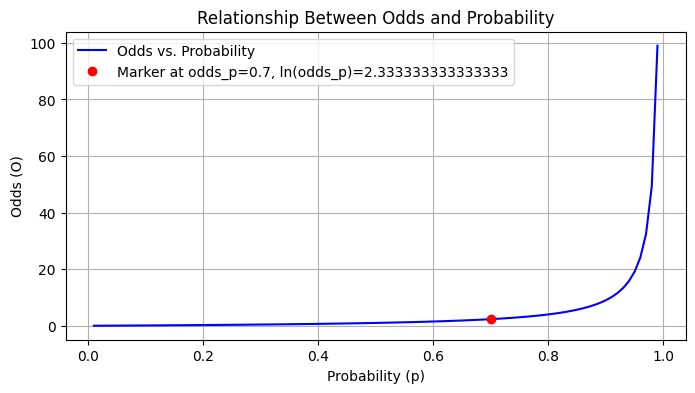

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of probabilities
p_values = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 as odds are undefined

# Calculate the corresponding odds using the odds formula
odds = p_values / (1 - p_values)

# Plot the relationship between probabilities and odds
plt.figure(figsize=(8, 4))
plt.plot(p_values, odds, label='Odds vs. Probability', color='blue')
plt.xlabel('Probability (p)')
plt.ylabel('Odds (O)')
plt.title('Relationship Between Odds and Probability')

# Add a red marker at x=2.33
marker_value = p
plt.plot(marker_value, marker_value / (1 - marker_value), 'ro', label=f'Marker at odds_p={marker_value}, ln(odds_p)={marker_value / (1 - marker_value)}')

plt.grid(True)
plt.legend()
plt.show()


### The relationship between odds and log odds

Below we can see that the natural logarithm is only defined for positive values, values close to 0 approach negative infinity. 

Correspondingly, the odds of an event occurring is always positive, as described above.

However, if the log odds is between 0 and 1 the log odds is negative. 

The natural logarithm, denoted as $\(\ln(x)\)$, is the inverse operation of raising $\(e\)$ (Euler's number, approximately 2.71828) to the power of $\(\ln(x)\)$. In other words, $\(\ln(x)\)$ is the power to which $\(e\)$ must be raised to obtain $\(x\)$:

$$
\[
\ln(x) = y \quad \text{if and only if} \quad e^y = x
\]
$$

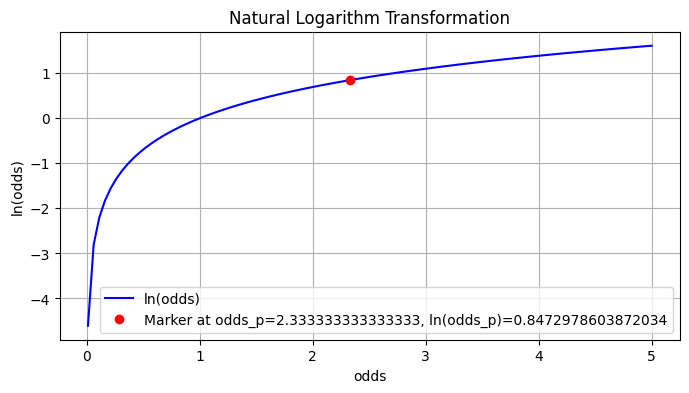

In [59]:
# Create a range of values
x = np.linspace(0.01, 5, 100)  # Avoid x=0 as ln(0) is undefined

# Calculate the natural logarithm (ln) of the values
ln_x = np.log(x)

# Plot the original values and their ln transformation
plt.figure(figsize=(8, 4))
plt.plot(x, ln_x, label='ln(odds)', color='blue')
plt.xlabel('odds')
plt.ylabel('ln(odds)')
plt.title('Natural Logarithm Transformation')

# Add a red marker at x=2.33
marker_value = odds_p
plt.plot(marker_value, np.log(marker_value), 'ro', label=f'Marker at odds_p={marker_value}, ln(odds_p)={np.log(marker_value)}')


plt.grid(True)
plt.legend()
plt.show()

### The relationship between log odds and exponentiation of log odds

We can see that the input of exponentiation is defined for all values. But the exponentiation is always a positive value. Any number raised to the power of e is positive.

Here we see that we can recover the odds by exponentiation of the log odds

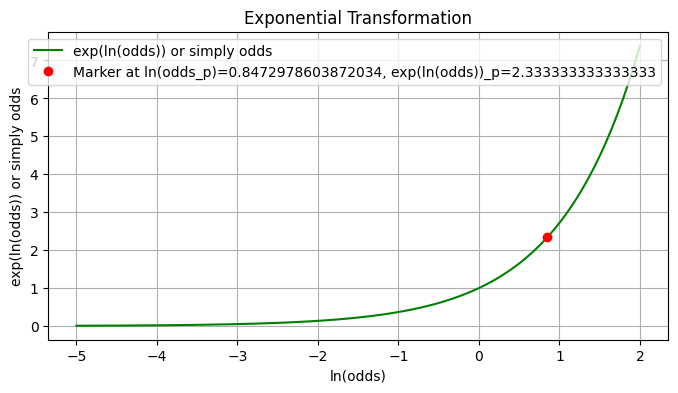

In [70]:
# Create a range of values
x = np.linspace(-5, 2, 100)

# Calculate the exponential (exp) of the values
exp_x = np.exp(x)

# Plot the original values and their exponential transformation
plt.figure(figsize=(8, 4))
plt.plot(x, exp_x, label='exp(ln(odds)) or simply odds', color='green')
plt.xlabel('ln(odds)')
plt.ylabel('exp(ln(odds)) or simply odds')
plt.title('Exponential Transformation')

# Add a red marker at x=2.33
marker_value = np.log(odds_p)
plt.plot(marker_value, np.exp(marker_value), 'ro', label=f'Marker at ln(odds_p)={marker_value}, exp(ln(odds))_p={np.exp(marker_value)}')

plt.grid(True)
plt.legend()
plt.show()

### The relationship between log odds and probability

Here we can see how the log odds is mapped to a probability; a number between 0 and 1 by using the logistic function, which is the inverse of the log odds

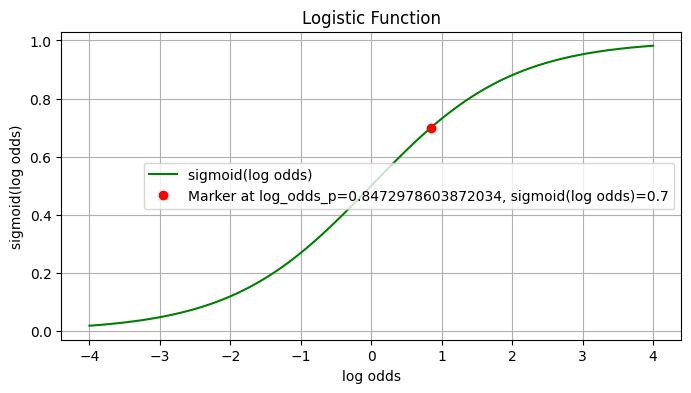

In [90]:
# Create a range of values
x = np.linspace(-4, 4, 100)

# Define the sigmoid function (inverse logit)
def sigmoid(logit):
    return 1 / (1 + np.exp(-logit))

# Plot the original values and their exponential transformation
plt.figure(figsize=(8, 4))
plt.plot(x, sigmoid(x), label='sigmoid(log odds)', color='green')
plt.xlabel('log odds')
plt.ylabel('sigmoid(log odds)')
plt.title('Logistic Function')


marker_value = log_odds_p
plt.plot(marker_value, sigmoid(marker_value), 'ro', label=f'Marker at log_odds_p={marker_value}, sigmoid(log odds)={sigmoid(marker_value)}')

plt.grid(True)
plt.legend()
plt.show()

## Investigating the logistic function

In [46]:
# Define the sigmoid function (inverse logit)
def sigmoid(logit):
    return 1 / (1 + np.exp(-logit))

# Create a range of probabilities (p)
p_values = np.linspace(0.01, 0.99, 100)

# Calculate log odds (logit) for these probabilities
log_odds = np.log(p_values / (1 - p_values))

# Calculate probabilities (p) from log odds using the sigmoid function
recovered_p_values = sigmoid(log_odds)

In [47]:
p_values

array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.08919192, 0.09909091,
       0.1089899 , 0.11888889, 0.12878788, 0.13868687, 0.14858586,
       0.15848485, 0.16838384, 0.17828283, 0.18818182, 0.19808081,
       0.2079798 , 0.21787879, 0.22777778, 0.23767677, 0.24757576,
       0.25747475, 0.26737374, 0.27727273, 0.28717172, 0.29707071,
       0.3069697 , 0.31686869, 0.32676768, 0.33666667, 0.34656566,
       0.35646465, 0.36636364, 0.37626263, 0.38616162, 0.39606061,
       0.4059596 , 0.41585859, 0.42575758, 0.43565657, 0.44555556,
       0.45545455, 0.46535354, 0.47525253, 0.48515152, 0.49505051,
       0.50494949, 0.51484848, 0.52474747, 0.53464646, 0.54454545,
       0.55444444, 0.56434343, 0.57424242, 0.58414141, 0.5940404 ,
       0.60393939, 0.61383838, 0.62373737, 0.63363636, 0.64353535,
       0.65343434, 0.66333333, 0.67323232, 0.68313131, 0.6930303 ,
       0.70292929, 0.71282828, 0.72272727, 0.73262626, 0.74252

In [48]:
log_odds

array([-4.59511985, -3.89698667, -3.48306372, -3.18597404, -2.95297783,
       -2.76052559, -2.59603652, -2.45199297, -2.32354176, -2.20736665,
       -2.10110056, -2.00299439, -1.91171878, -1.82623947, -1.7457357 ,
       -1.66954502, -1.59712486, -1.52802505, -1.46186779, -1.39833278,
       -1.33714595, -1.27807084, -1.22090187, -1.16545902, -1.11158369,
       -1.05913523, -1.00798825, -0.95803034, -0.9091602 , -0.86128613,
       -0.81432469, -0.76819965, -0.72284103, -0.67818431, -0.63416977,
       -0.5907419 , -0.54784885, -0.50544203, -0.4634757 , -0.42190661,
       -0.3806937 , -0.33979784, -0.29918154, -0.25880875, -0.21864467,
       -0.1786555 , -0.13880831, -0.09907085, -0.05941141, -0.01979863,
        0.01979863,  0.05941141,  0.09907085,  0.13880831,  0.1786555 ,
        0.21864467,  0.25880875,  0.29918154,  0.33979784,  0.3806937 ,
        0.42190661,  0.4634757 ,  0.50544203,  0.54784885,  0.5907419 ,
        0.63416977,  0.67818431,  0.72284103,  0.76819965,  0.81

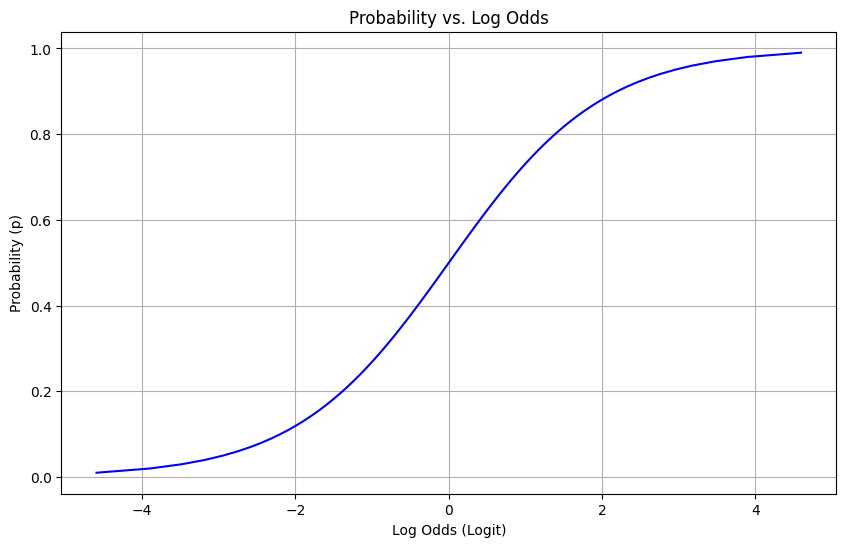

In [54]:
# Plot the relationship between p and logit
plt.figure(figsize=(10, 6))
plt.plot(log_odds, p_values, label='p vs. Logit', color='blue')
plt.xlabel('Log Odds (Logit)')
plt.ylabel('Probability (p)')
plt.title('Probability vs. Log Odds')
plt.grid(True)

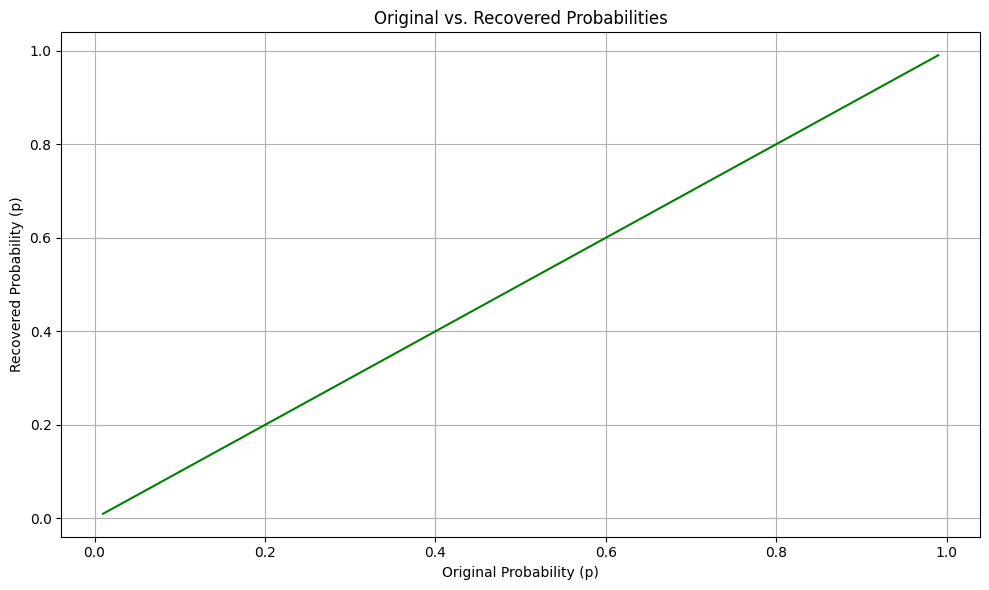

In [55]:
plt.figure(figsize=(10, 6))

# Plot the recovered probabilities (should match the original p values)
plt.plot(p_values, recovered_p_values, label='Original p vs. Recovered p', color='green')
plt.xlabel('Original Probability (p)')
plt.ylabel('Recovered Probability (p)')
plt.title('Original vs. Recovered Probabilities')
plt.grid(True)

plt.tight_layout()
plt.show()

This graph simply shows that the relationship between the probability and the recovered probability is one to one. Which is expected. 